# Graph Pose SLAM

### **Odometry Data:**
From odometry, we typically get the poses $ \textbf{X}_i $ and $ \textbf{X}_j $ in the world frame. These poses represent the robot's estimated positions and orientations based on the odometry readings.

### **Relative Transformation from Poses:**
Using the poses $ \textbf{X}_i $ and $ \textbf{X}_j $ in the world frame, we can compute the **predicted relative pose** of $ \textbf{X}_j $ with respect to $ \textbf{X}_i $, denoted as $ h(\textbf{X}_i, \textbf{X}_j) $. This transformation involves the relative translation and rotation between $ \textbf{X}_i $ and $ \textbf{X}_j $.



${^{i}_{j}X}$: is the pose of the $j_{th}$farme in $i_{th}$ frame, to get the pose of the robot from world coordinate in the $i_{th}$ frame: 

 <img src="https://latex.codecogs.com/svg.latex?%7B%5E%7Bi%7D_%7Bj%7DX%7D%3D%28%7B%5E%7Bw%7D_%7Bi%7DT%20%5E%7B-1%7D%7D%20%29%5Ctimes%20%28%20%7B%5E%7Bw%7D_%7Bj%7DX%7D%29" alt="https://latex.codecogs.com/svg.latex?{^{i}_{j}X}=({^{w}_{i}T ^{-1}} )\times ( {^{w}_{j}X})" />

which is:

 <img src="https://latex.codecogs.com/svg.latex?%7B%5E%7Bi%7D_%7Bj%7DX%7D%3D%20%5Cbegin%7Bbmatrix%7D%20%7B%5E%7Bw%7D_%7Bi%7DR%7D%5ET%20%26%20-%7B%5E%7Bw%7D_%7Bi%7DR%7D%5ET%20%5Ctimes%20%28%7B%5E%7Bw%7D_%7Bi%7DP%7D%29%20%5C%5C%200%20%26%201%20%5Cend%7Bbmatrix%7D%20%5Ctimes%20%28%20%7B%5E%7Bw%7D_%7Bj%7DX%7D%29" alt="https://latex.codecogs.com/svg.latex?{^{i}_{j}X}= \begin{bmatrix}
{^{w}_{i}R}^T &   -{^{w}_{i}R}^T \times ({^{w}_{i}P})  \\ 
0 & 1  
\end{bmatrix} \times ( {^{w}_{j}X})" />




Just like what we did to bring point in the world coordinate to camera coordinate, we can do the same here:

<img src="https://latex.codecogs.com/svg.latex?%7B%5E%7Bi%7D_%7Bj%7DR%7D%3D%28%7B%5E%7Bw%7D_%7Bi%7DR%20%5ET%7D%20%29%5Ctimes%20%28%20%7B%5E%7Bw%7D_%7Bj%7DR%7D%29" alt="https://latex.codecogs.com/svg.latex?{^{i}_{j}R}=({^{w}_{i}R ^T} )\times ( {^{w}_{j}R})" />



<img src="https://latex.codecogs.com/svg.latex?%5E%7Bi%7D_jP%3D%5E%7Bw%7D_iR%5ET%20%28%20%7B%5E%7Bw%7D_%7Bj%7DP%7D%20-%7B%5E%7Bw%7D_%7Bi%7DP%7D%20%29" alt="https://latex.codecogs.com/svg.latex?^{i}_jP=^{w}_iR^T (  {^{w}_{j}P} -{^{w}_{i}P} ) " />

which gives us: 



<img src="https://latex.codecogs.com/svg.latex?%5Cbegin%7Bbmatrix%7D%20%5E%7Bi%7D_j%20x%20%5C%5C%20%5E%7Bi%7D_j%20y%20%5Cend%7Bbmatrix%7D%3D%5Cbegin%7Bbmatrix%7D%20cos%28i%5Ew%20%5Ctheta%20%29%20%26%20sin%28i%5Ew%20%5Ctheta%20%29%20%5C%5C%20-sin%28i%5Ew%20%5Ctheta%20%29%20%26%20cos%28i%5Ew%20%5Ctheta%29%20%5Cend%7Bbmatrix%7D%20%5Cbegin%7Bbmatrix%7D%20%5E%7Bw%7D_jx%20-%20%5E%7Bw%7D_ix%20%5C%5C%20%5E%7Bw%7D_jy%20-%20%5E%7Bw%7D_iy%20%5Cend%7Bbmatrix%7D" alt="https://latex.codecogs.com/svg.latex?\begin{bmatrix} ^{i}_j x \\  ^{i}_j y \end{bmatrix}=\begin{bmatrix} cos(i^w \theta ) & sin(i^w \theta ) \\ -sin(i^w \theta ) & cos(i^w \theta) \end{bmatrix} \begin{bmatrix} ^{w}_jx - ^{w}_ix \\  ^{w}_jy - ^{w}_iy \end{bmatrix}" />




<img src="https://latex.codecogs.com/svg.latex?%5E%7Bi%7D_j%20%5Ctheta%20%3D%5E%7Bw%7D_j%5Ctheta%20-%7B%5E%7Bw%7D_%7Bi%7D%5Ctheta%7D" alt="https://latex.codecogs.com/svg.latex?^{i}_j \theta =^{w}_j\theta -{^{w}_{i}\theta}" />

### **Sensor Measurements:**
From the sensor (e.g., a laser scanner or camera), we obtain a measurement $ z_{ij} $, which represents the **observed relative pose** of $ \textbf{X}_j $ with respect to $ \textbf{X}_i $. This measurement typically includes relative position and orientation.




### State Vector
The state vector $ \mathbb{X} $ contains the 2D poses of all $ n $ nodes:

$
\mathbb{X} = (x_1, y_1, \theta_1, x_2, y_2, \theta_2, \dots, x_n, y_n, \theta_n)
$

Each pose $ \textbf{X}_i = (x_i, y_i, \theta_i) $ represents the position and orientation of a node.

---

### **Error Function:**

The error function compares the **predicted relative pose** $ h(\textbf{X}_i, \textbf{X}_j) $ (computed from odometry poses) to the **observed relative pose** $ z_{ij} $ (sensor measurement):

$e_{ij} = z_{ij} - h(\textbf{X}_i, \textbf{X}_j)$


$
\textbf{e}_{ij}(\mathbb{X}) = \textbf{e}_{ij}(\textbf{X}_i, \textbf{X}_j)
$

Where the components of $ \textbf{e}_{ij} $ are given by:

$
\textbf{e}_{ij}(\textbf{X}_i, \textbf{X}_j) = 
\begin{bmatrix}
^i_jx \\ 
^i_jy \\ 
^{i}_j \theta 
\end{bmatrix}
=
\begin{bmatrix}
\cos(\theta_i)(x_j - x_i) + \sin(\theta_i)(y_j - y_i) - z_x \\
-\sin(\theta_i)(x_j - x_i) + \cos(\theta_i)(y_j - y_i) - z_y \\
\theta_j - \theta_i - z_\theta
\end{bmatrix}
$

Here:
- $ z_x, z_y, z_\theta $ are the observed relative pose measurements.
- $ x_j, y_j, \theta_j $ and $ x_i, y_i, \theta_i $ are the current estimates of the poses.

---





### **Linearization of the Error Function**
The error function for an edge $ij$ is:

$
e_{ij} = z_{ij} - h(\textbf{X}_i, \textbf{X}_j)
$

Where:
- $ z_{ij} = \begin{bmatrix} z_x \\ z_y \\ z_\theta \end{bmatrix} $ is the observed relative pose.
- $ h(\textbf{X}_i, \textbf{X}_j) $ is the predicted relative pose computed from the current estimate of $ \textbf{X}_i $ and $ \textbf{X}_j $:

$
h(\textbf{X}_i, \textbf{X}_j) =
\begin{bmatrix}
\cos(\theta_i)(x_j - x_i) + \sin(\theta_i)(y_j - y_i) \\
-\sin(\theta_i)(x_j - x_i) + \cos(\theta_i)(y_j - y_i) \\
\theta_j - \theta_i
\end{bmatrix}
$

We linearize $ e_{ij} $ around the **current estimate** using a first-order Taylor expansion:

$
e_{ij} \approx e_{ij}^k + J_i \Delta \textbf{X}_i + J_j \Delta \textbf{X}_j
$

Where:
- $ e_{ij}^k = z_{ij} - h(\textbf{X}_i^k, \textbf{X}_j^k) $ is the error at the current estimate.
- $ J_i = \frac{\partial e_{ij}}{\partial \textbf{X}_i} $ and $ J_j = \frac{\partial e_{ij}}{\partial \textbf{X}_j} $ are the Jacobians.

---

### **Jacobians: $ J_i $ and $ J_j $**
The Jacobians are derived by taking the partial derivatives of $ e_{ij} $ with respect to $ \textbf{X}_i $ and $ \textbf{X}_j $. For the predicted relative pose $ h(\textbf{X}_i, \textbf{X}_j) $, we compute:

#### 1. Jacobian with respect to $ \textbf{X}_i $ ($ J_i $):

$
J_i =
\begin{bmatrix}
-\cos(\theta_i) & -\sin(\theta_i) & -\sin(\theta_i)(x_j - x_i) + \cos(\theta_i)(y_j - y_i) \\
\sin(\theta_i) & -\cos(\theta_i) & -\cos(\theta_i)(x_j - x_i) - \sin(\theta_i)(y_j - y_i) \\
0 & 0 & -1
\end{bmatrix}
$

#### 2. Jacobian with respect to $ \textbf{X}_j $ ($ J_j $):

$
J_j =
\begin{bmatrix}
\cos(\theta_i) & \sin(\theta_i) & 0 \\
-\sin(\theta_i) & \cos(\theta_i) & 0 \\
0 & 0 & 1
\end{bmatrix}
$

---

### **Information Matrix $H$ and Residual Vector $b$**
We use the linearized error function in the least-squares formulation. The goal is to minimize:

$
E = \frac{1}{2} \sum_{ij} e_{ij}^T \Omega_{ij} e_{ij}
$

Where:
- $ \Omega_{ij} $ is the **information matrix** (inverse of the measurement covariance matrix).

#### Expanding $E$:
Substituting the linearized error $ e_{ij} \approx e_{ij}^k + J_i \Delta \textbf{X}_i + J_j \Delta \textbf{X}_j $:

$
E \approx \frac{1}{2} \sum_{ij} \left( e_{ij}^k + J_i \Delta \textbf{X}_i + J_j \Delta \textbf{X}_j \right)^T \Omega_{ij} \left( e_{ij}^k + J_i \Delta \textbf{X}_i + J_j \Delta \textbf{X}_j \right)
$

#### Quadratic Expansion:
After expanding and keeping only the terms relevant to optimization:

$
E \approx \frac{1}{2} \sum_{ij} \left( (e_{ij}^k)^T \Omega_{ij} e_{ij}^k + 2(e_{ij}^k)^T \Omega_{ij} (J_i \Delta \textbf{X}_i + J_j \Delta \textbf{X}_j) + \Delta \textbf{X}^T H_{ij} \Delta \textbf{X} \right)
$

Where $ H_{ij} = J_i^T \Omega_{ij} J_i + J_j^T \Omega_{ij} J_j + J_i^T \Omega_{ij} J_j + J_j^T \Omega_{ij} J_i $.

#### Global $H$ and $b$:
The contributions to the global $ H $ (information matrix) and $ b $ (residual vector) are:

1. **Information Matrix $ H $:**
   - Add contributions for all edges:
     $
     H = \sum_{ij} J_i^T \Omega_{ij} J_i + J_j^T \Omega_{ij} J_j + J_i^T \Omega_{ij} J_j + J_j^T \Omega_{ij} J_i
     $

2. **Residual Vector $ b $:**
   - Add contributions for all edges:
     $
     b = \sum_{ij} -J_i^T \Omega_{ij} e_{ij}^k - J_j^T \Omega_{ij} e_{ij}^k
     $

---

### Final System:
The optimization problem becomes solving the linear system:

$
H \Delta \textbf{X} = b
$

Where:
- $ \Delta \textbf{X} $ is the pose correction vector.
- $ H $ is the global sparse information matrix.
- $ b $ is the global residual vector.

This system can be solved iteratively using methods like Gauss-Newton or Levenberg-Marquardt until the corrections $ \Delta \textbf{X} $ are sufficiently small.

### Jacobians and Linearization
To linearize the error function, we compute its Jacobian with respect to the poses $x_i$ and $x_j$:

$
e_{ij} \approx e_{ij}(x_i^k, x_j^k) + J_i \Delta x_i + J_j \Delta x_j
$

Where:
- $x_i^k$ and $x_j^k$ are the current estimates of the poses,
- $\Delta x_i$ and $\Delta x_j$ are the pose corrections,
- $J_i = \frac{\partial e_{ij}}{\partial x_i}$ and $J_j = \frac{\partial e_{ij}}{\partial x_j}$ are the Jacobians of the error function with respect to $x_i$ and $x_j$.

### Building $H$ and $b$
The contributions to the information matrix ($H$) and residual vector ($b$) are derived from the squared error:

$
e_{ij}^T \Omega_{ij} e_{ij}
$

Where $\Omega_{ij}$ is the information matrix for the edge $ij$ (inverse of the measurement covariance matrix).

The contributions to $H$ and $b$ are computed as:

1. **Residual Vector ($b$):**

   $
   b_i = - J_i^T \Omega_{ij} e_{ij}
   $
   $
   b_j = - J_j^T \Omega_{ij} e_{ij}
   $

   These are summed into the global residual vector.

2. **Information Matrix ($H$):**

   $
   H_{ii} = J_i^T \Omega_{ij} J_i
   $
   $
   H_{ij} = J_i^T \Omega_{ij} J_j
   $
   $
   H_{jj} = J_j^T \Omega_{ij} J_j
   $

   These are summed into the global $H$, which is a sparse matrix.

### Summary Equation
The global least-squares problem becomes:

$
H \Delta x = b
$

Where:
- $H$ is the global information matrix,
- $\Delta x$ is the vector of pose corrections,
- $b$ is the global residual vector.

This system can be solved iteratively (e.g., using Gauss-Newton or Levenberg-Marquardt) to update the pose estimates and minimize the error.

For this error, function, which is a function of 6 variables, $(x_i,y_i,\theta_i,x_j,y_j,\theta_j)$, the $J_{ij}$ element of the jacobian matrix is:

$\\ J_{ij}=\begin{bmatrix} 0 & ... & 0 & \frac{\partial ^{i}_jx}{ \partial _{i} x}      &  \frac{\partial ^{i}_jx}{ \partial _{i} y}  & \frac{\partial ^{i}_j x}{ \partial _{i} \theta} &0 &... & \frac{\partial ^{i}_jx}{ \partial _{j} x}      &  \frac{\partial ^{i}_jx}{ \partial _{j} y}  & \frac{\partial ^{i}_j x}{ \partial _{j} \theta}  &... &0\\ 0 & ... & 0 & \frac{\partial ^{i}_jy}{ \partial _{i} x} &  \frac{\partial ^{i}_jy}{ \partial _{i} y}  & \frac{\partial ^{i}_j y}{ \partial _{i} \theta} &0   &...& \frac{\partial ^{i}_jy}{ \partial _{j} x} &  \frac{\partial ^{i}_jy}{ \partial _{j} y}  & \frac{\partial ^{i}_j y}{ \partial _{j} \theta}& ...     & 0\\ 0 & ... & 0 & \frac{\partial ^{i}_j\theta}{ \partial _{i} x}      &  \frac{\partial ^{i}_j\theta}{ \partial _{i} y}  & \frac{\partial ^{i}_j \theta}{ \partial _{i} \theta} &0 &...&\frac{\partial ^{i}_j\theta}{ \partial _{j} x}      &  \frac{\partial ^{i}_j\theta}{ \partial _{j} y}  & \frac{\partial ^{i}_j \theta}{ \partial _{j} \theta} &...  & 0\\ \end{bmatrix}$

$A_{i,j}=  \frac{ \partial   \textbf{e}(\textbf{X}_{i})}{  \partial  \textbf{X}_{j}  }      $



$A_{ij}=\begin{bmatrix}  \frac{\partial ^{i}_jx}{ \partial _{i} x}      &  \frac{\partial ^{i}_jx}{ \partial _{i} y}  & \frac{\partial ^{i}_j x}{ \partial _{i} \theta} \\ \frac{\partial ^{i}_jy}{ \partial _{i} x} &  \frac{\partial ^{i}_jy}{ \partial _{i} y}  & \frac{\partial ^{i}_j y}{ \partial _{i} \theta} \\ \frac{\partial ^{i}_j\theta}{ \partial _{i} x}      &  \frac{\partial ^{i}_j\theta}{ \partial _{i} y}  & \frac{\partial ^{i}_j \theta}{ \partial _{i} \theta} \\ \end{bmatrix}$


$A_{i,j}=\begin{bmatrix} -cos(\theta_i) & -sin(\theta_i)  & -sin(\theta_i)(x_j-x_i)+cos(\theta_i)(y_j-y_i)\\ sin(\theta_i) & -cos(\theta_i) & -cos(\theta_i)(x_j-x_i) - sin(\theta_i)(y_j-y_i)\\ 0 & 0 & -1 \end{bmatrix}$

<img src="https://latex.codecogs.com/svg.latex?B_%7Bi%2Cj%7D%3D%5Cbegin%7Bbmatrix%7D%20cos%28%5Ctheta_i%29%20%26%20-sin%28%5Ctheta_i%29%20%26%200%5C%5C%20-sin%28%5Ctheta_i%29%20%26%20cos%28%5Ctheta_i%29%20%26%200%5C%5C%200%20%26%200%20%26%201%20%5Cend%7Bbmatrix%7D" alt="https://latex.codecogs.com/svg.latex?B_{i,j}=\begin{bmatrix} cos(\theta_i) & -sin(\theta_i)  & 0\\  -sin(\theta_i) & cos(\theta_i) & 0\\  0 & 0 & 1 \end{bmatrix}" />





### 1. **Error Function and its Variables**
The error function depends only on the poses $(x_i, y_i, \theta_i, x_j, y_j, \theta_j)$. Since $z_x$, $z_y$, and $z_\theta$ are constants (observed measurements), they do not influence the derivatives, and hence they do not appear in the Jacobian.

Since the measurements $z_x, z_y, z_\theta$ are constants and do not depend on the state variables $(x_i, y_i, \theta_i, x_j, y_j, \theta_j)$, they do not appear in the derivatives. This is correct, and the Jacobian depends solely on the current estimates of the state variables.


### 2. **Jacobian Matrix Structure**
The Jacobian $J_{ij}$ matrix provided correctly represents the structure of the derivatives of the error function with respect to the state variables. The detailed form:

$
J_{ij} = 
\begin{bmatrix}
0 & \cdots & 0 & \frac{\partial e_{x}}{\partial x_i} & \frac{\partial e_{x}}{\partial y_i} & \frac{\partial e_{x}}{\partial \theta_i} & 0 & \cdots & 0 & \frac{\partial e_{x}}{\partial x_j} & \frac{\partial e_{x}}{\partial y_j} & \frac{\partial e_{x}}{\partial \theta_j} & \cdots & 0 \\
0 & \cdots & 0 & \frac{\partial e_{y}}{\partial x_i} & \frac{\partial e_{y}}{\partial y_i} & \frac{\partial e_{y}}{\partial \theta_i} & 0 & \cdots & 0 & \frac{\partial e_{y}}{\partial x_j} & \frac{\partial e_{y}}{\partial y_j} & \frac{\partial e_{y}}{\partial \theta_j} & \cdots & 0 \\
0 & \cdots & 0 & \frac{\partial e_{\theta}}{\partial x_i} & \frac{\partial e_{\theta}}{\partial y_i} & \frac{\partial e_{\theta}}{\partial \theta_i} & 0 & \cdots & 0 & \frac{\partial e_{\theta}}{\partial x_j} & \frac{\partial e_{\theta}}{\partial y_j} & \frac{\partial e_{\theta}}{\partial \theta_j} & \cdots & 0
\end{bmatrix}
$

### 3. **Jacobian Block Structure**
The block $A_{ij}$ represents the partial derivatives of the error function with respect to the individual pose variables. Its structure is correctly described as:

$
A_{ij} =
\begin{bmatrix}
\frac{\partial e_x}{\partial x_i} & \frac{\partial e_x}{\partial y_i} & \frac{\partial e_x}{\partial \theta_i} \\
\frac{\partial e_y}{\partial x_i} & \frac{\partial e_y}{\partial y_i} & \frac{\partial e_y}{\partial \theta_i} \\
\frac{\partial e_{\theta}}{\partial x_i} & \frac{\partial e_{\theta}}{\partial y_i} & \frac{\partial e_{\theta}}{\partial \theta_i}
\end{bmatrix}
$

### 4. **Jacobian for $A_{i,j}$**
The specific Jacobian block for $A_{i,j}$ (with respect to $\textbf{X}_i$) is:

$
A_{i,j} = 
\begin{bmatrix}
-\cos(\theta_i) & -\sin(\theta_i) & -\sin(\theta_i)(x_j-x_i) + \cos(\theta_i)(y_j-y_i) \\
\sin(\theta_i) & -\cos(\theta_i) & -\cos(\theta_i)(x_j-x_i) - \sin(\theta_i)(y_j-y_i) \\
0 & 0 & -1
\end{bmatrix}
$




$ B_{ij} = \frac{\partial \textbf{e}_{ij}}{\partial \textbf{X}_j} $
The error function is:

$
\textbf{e}_{ij}(\textbf{X}_i, \textbf{X}_j) = 
\begin{bmatrix}
^i_jx \\
^i_jy \\
^i_j\theta
\end{bmatrix}
$

Where:

$
^i_jx = \cos(\theta_i)(x_j - x_i) + \sin(\theta_i)(y_j - y_i)
$
$
^i_jy = -\sin(\theta_i)(x_j - x_i) + \cos(\theta_i)(y_j - y_i)
$
$
^i_j\theta = \theta_j - \theta_i
$

#### Partial Derivatives for $ B_{ij} $
The Jacobian with respect to $ \textbf{X}_j = (x_j, y_j, \theta_j) $ is:

$
B_{ij} = \frac{\partial \textbf{e}_{ij}}{\partial \textbf{X}_j} =
\begin{bmatrix}
\frac{\partial ^i_jx}{\partial x_j} & \frac{\partial ^i_jx}{\partial y_j} & \frac{\partial ^i_jx}{\partial \theta_j} \\
\frac{\partial ^i_jy}{\partial x_j} & \frac{\partial ^i_jy}{\partial y_j} & \frac{\partial ^i_jy}{\partial \theta_j} \\
\frac{\partial ^i_j\theta}{\partial x_j} & \frac{\partial ^i_j\theta}{\partial y_j} & \frac{\partial ^i_j\theta}{\partial \theta_j}
\end{bmatrix}
$

#### Computing Each Partial Derivative
1. For $ ^i_jx $:
   $
   \frac{\partial ^i_jx}{\partial x_j} = \cos(\theta_i), \quad
   \frac{\partial ^i_jx}{\partial y_j} = \sin(\theta_i), \quad
   \frac{\partial ^i_jx}{\partial \theta_j} = 0
   $

2. For $ ^i_jy $:
   $
   \frac{\partial ^i_jy}{\partial x_j} = -\sin(\theta_i), \quad
   \frac{\partial ^i_jy}{\partial y_j} = \cos(\theta_i), \quad
   \frac{\partial ^i_jy}{\partial \theta_j} = 0
   $

3. For $ ^i_j\theta $:
   $
   \frac{\partial ^i_j\theta}{\partial x_j} = 0, \quad
   \frac{\partial ^i_j\theta}{\partial y_j} = 0, \quad
   \frac{\partial ^i_j\theta}{\partial \theta_j} = 1
   $

#### Final Form of $ B_{ij} $
$
B_{ij} =
\begin{bmatrix}
\cos(\theta_i) & \sin(\theta_i) & 0 \\
-\sin(\theta_i) & \cos(\theta_i) & 0 \\
0 & 0 & 1
\end{bmatrix}
$



### Jacobians for Linearization
The error function is linearized around the current estimate using the Jacobians with respect to $ \textbf{X}_i $ and $ \textbf{X}_j $. The Jacobians are:

$
J_i = \frac{\partial \textbf{e}_{ij}}{\partial \textbf{X}_i}, \quad
J_j = \frac{\partial \textbf{e}_{ij}}{\partial \textbf{X}_j}
$

#### Jacobian with respect to $ \textbf{X}_i $:
$
J_i =
\begin{bmatrix}
-\cos(\theta_i) & -\sin(\theta_i) & -\sin(\theta_i)(x_j - x_i) + \cos(\theta_i)(y_j - y_i) \\
\sin(\theta_i) & -\cos(\theta_i) & -\cos(\theta_i)(x_j - x_i) - \sin(\theta_i)(y_j - y_i) \\
0 & 0 & -1
\end{bmatrix}
$

#### Jacobian with respect to $ \textbf{X}_j $:
$
J_j =
\begin{bmatrix}
\cos(\theta_i) & \sin(\theta_i) & 0 \\
-\sin(\theta_i) & \cos(\theta_i) & 0 \\
0 & 0 & 1
\end{bmatrix}
$

---

### Building $ b $ and $ H $
For each edge $ ij $, the contributions to the residual vector $ b $ and information matrix $ H $ are computed as:

1. **Residual Vector Contribution ($ b $):**

$
b_i = - J_i^T \Omega_{ij} \textbf{e}_{ij}, \quad b_j = - J_j^T \Omega_{ij} \textbf{e}_{ij}
$

Where $ \Omega_{ij} $ is the information matrix for the measurement $ z_{ij} $ (inverse of its covariance).

2. **Information Matrix Contribution ($ H $):**

$
H_{ii} = J_i^T \Omega_{ij} J_i, \quad
H_{ij} = J_i^T \Omega_{ij} J_j, \quad
H_{jj} = J_j^T \Omega_{ij} J_j
$

These contributions are summed into the global matrix $ H $ and vector $ b $ for all edges.

---

### Final System
After aggregating contributions from all edges, the optimization problem can be expressed as:

$
H \Delta \mathbb{X} = b
$

Where:
- $ H $ is the global sparse information matrix,
- $ \Delta \mathbb{X} $ is the correction to the current pose estimates,
- $ b $ is the global residual vector.

This system is solved iteratively (e.g., using Gauss-Newton or Levenberg-Marquardt) to update $ \mathbb{X} $ and minimize the total error.

Let’s explicitly derive the components of $ H_{ii} $, $ H_{ij} $, $ b_{ii} $, and $ b_{ij} $ for the linearized system.

---

### **From the Linearized Error Function**
The linearized error function is:

$
e_{ij} \approx e_{ij}^k + J_i \Delta \textbf{X}_i + J_j \Delta \textbf{X}_j
$

The energy function for the least-squares problem is:

$
E = \frac{1}{2} \sum_{ij} e_{ij}^T \Omega_{ij} e_{ij}
$

Expanding $E$ using the linearized error:

$
E \approx \frac{1}{2} \sum_{ij} \left( e_{ij}^k + J_i \Delta \textbf{X}_i + J_j \Delta \textbf{X}_j \right)^T \Omega_{ij} \left( e_{ij}^k + J_i \Delta \textbf{X}_i + J_j \Delta \textbf{X}_j \right)
$

---

### **Derivation of $ H_{ii} $, $ H_{ij} $, $ b_{ii} $, $ b_{ij} $**
By collecting terms in the quadratic form, we get:

1. **Information Matrix $H_{ii}$:**
   Contribution from pose $ \textbf{X}_i $ for edge $ ij $:
   $
   H_{ii} = J_i^T \Omega_{ij} J_i
   $

2. **Information Matrix $H_{ij}$:**
   Cross-term contribution between poses $ \textbf{X}_i $ and $ \textbf{X}_j $:
   $
   H_{ij} = J_i^T \Omega_{ij} J_j
   $

   Note: $ H_{ij} $ is not diagonal—it represents the coupling between the two poses.

3. **Residual Vector $b_i$:**
   Contribution from pose $ \textbf{X}_i $ to the residual vector:
   $
   b_i = -J_i^T \Omega_{ij} e_{ij}^k
   $

4. **Residual Vector $b_j$:**
   Contribution from pose $ \textbf{X}_j $ to the residual vector:
   $
   b_j = -J_j^T \Omega_{ij} e_{ij}^k
   $

---

### **Explicit Components**

Using the previously derived Jacobians for $ J_i $ and $ J_j $, we can compute $ H_{ii} $, $ H_{ij} $, $ b_i $, and $ b_j $.

1. **$H_{ii}$:**
   $
   H_{ii} = J_i^T \Omega_{ij} J_i
   $
   Substituting $ J_i $ (as derived earlier):
   $
   J_i =
   \begin{bmatrix}
   -\cos(\theta_i) & -\sin(\theta_i) & -\sin(\theta_i)(x_j - x_i) + \cos(\theta_i)(y_j - y_i) \\
   \sin(\theta_i) & -\cos(\theta_i) & -\cos(\theta_i)(x_j - x_i) - \sin(\theta_i)(y_j - y_i) \\
   0 & 0 & -1
   \end{bmatrix}
   $

   Multiply $ J_i^T $ and $ J_i $, weighted by $ \Omega_{ij} $.

2. **$H_{ij}$:**
   $
   H_{ij} = J_i^T \Omega_{ij} J_j
   $
   Substituting $ J_i $ and $ J_j $:
   $
   J_j =
   \begin{bmatrix}
   \cos(\theta_i) & \sin(\theta_i) & 0 \\
   -\sin(\theta_i) & \cos(\theta_i) & 0 \\
   0 & 0 & 1
   \end{bmatrix}
   $

   Multiply $ J_i^T $ and $ J_j $, weighted by $ \Omega_{ij} $.

3. **$b_{i}$:**
   $
   b_{i} = -J_i^T \Omega_{ij} e_{ij}^k
   $
   Substituting $ J_i $ and $ e_{ij}^k $:
   $
   e_{ij}^k = z_{ij} - h(\textbf{X}_i, \textbf{X}_j)
   $

4. **$b_{j}$:**
   $
   b_{j} = -J_j^T \Omega_{ij} e_{ij}^k
   $

---

### Summary of Key Terms

- $H_{ii} = J_i^T \Omega_{ij} J_i$
- $H_{ij} = J_i^T \Omega_{ij} J_j$
- $b_{i} = -J_i^T \Omega_{ij} e_{ij}^k$
- $b_{j} = -J_j^T \Omega_{ij} e_{ij}^k$

These contributions are summed over all edges $ij$ in the graph to form the global $H$ and $b$:

$
H = \sum_{ij} \begin{bmatrix}
H_{ii} & H_{ij} \\
H_{ji} & H_{jj}
\end{bmatrix}, \quad
b = \sum_{ij} \begin{bmatrix}
b_{i} \\
b_{j}
\end{bmatrix}
$



<img src="images/J_i_j.png"  width= "50%"  height= "50%"/>

<br/>
<br/>
<img src="images/b_h.png" width= "50%"  height= "50%"/>

<br/>
<br/>
<img src="images/b_i_j_h_i_j.png" width= "50%"  height= "50%" />

<br/>
<br/>
<img src="images/building_the_linear_system.png" width= "50%"  height= "50%" />

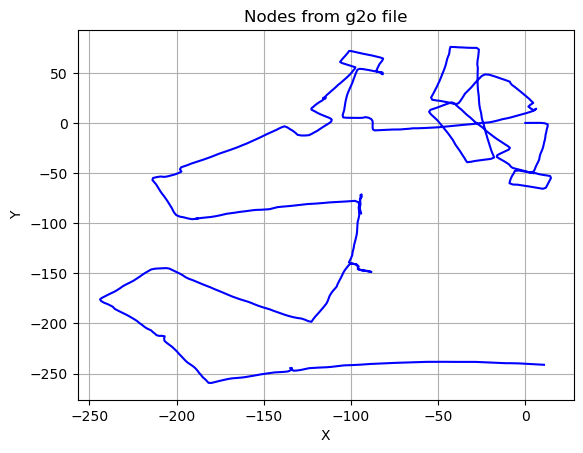

iter 1 with delta = 9776.815836743128
iter 2 with delta = 9921.583588625203
iter 3 with delta = 5304.764805540707
iter 4 with delta = 3618.3965580675276
iter 5 with delta = 933.9939988930216
iter 6 with delta = 659.25179621676
iter 7 with delta = 98.17909009324742
iter 8 with delta = 176.51470377625068
iter 9 with delta = 23.082354732268218
iter 10 with delta = 53.59284151969517
iter 11 with delta = 13.98510759884786
iter 12 with delta = 17.16245467982526
iter 13 with delta = 7.564224626983518
iter 14 with delta = 6.354698522871116
iter 15 with delta = 3.803701239394619
iter 16 with delta = 2.6231639339095367
iter 17 with delta = 1.8327618063756572
iter 18 with delta = 1.1540969135263155
iter 19 with delta = 0.8626333855900739
iter 20 with delta = 0.524695669824352
iter 21 with delta = 0.40107997682030955
iter 22 with delta = 0.2423091067959811
iter 23 with delta = 0.1853608923816005
iter 24 with delta = 0.11268047897148246
iter 25 with delta = 0.08543853115972769
iter 26 with delta = 

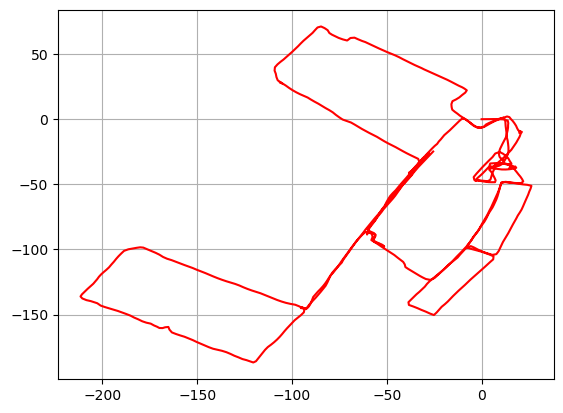

In [7]:
# Cell 1: Imports and Configuration

import os
import matplotlib.pyplot as plt
import math
import numpy as np

# Configuration
#np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.4f}'.format}, threshold=sys.maxsize)


def getNode(nodes, id):
    for node in nodes:

        if node["id"] == id:
            return node

# Cell 2: Helper Functions
def wrap2pi(theta):
    while theta > math.pi:
        theta = theta - 2 * math.pi
    while theta < -math.pi:
        theta = theta + 2 * math.pi
    return theta

def rot2(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], 
                     [np.sin(theta), np.cos(theta)]])

def update_node(node, dx):
    node["state"][0] += dx[0]
    node["state"][1] += dx[1]
    node["state"][2] = wrap2pi(node["state"][2] + dx[2])
    return node

# Cell 3: load_2d_g2o Function
def load_2d_g2o(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    nodes = []
    edges = []
    for line in lines:
        line = line.strip()
        if line.startswith('VERTEX_SE2'):
            parts = line.split()
            node = {
                'id': int(parts[1]),
                'state': [float(parts[2]), float(parts[3]), float(parts[4])]
            }
            nodes.append(node)
        elif line.startswith('EDGE_SE2'):
            parts = line.split()
            edge = {
                'id1': int(parts[1]),
                'id2': int(parts[2]),
                'meas': [float(parts[3]), float(parts[4]), float(parts[5])],
                'info': [[float(parts[6]), float(parts[7]), float(parts[8])],
                         [float(parts[7]), float(parts[9]), float(parts[10])],
                         [float(parts[8]), float(parts[10]), float(parts[11])]]
            }
            edges.append(edge)
    return nodes, edges

# Cell 4: Main Code Logic
# Replace this with the path to your .g2o file
g2o_file = os.path.abspath("/home/behnam/workspace/robotic_notes/data/slam/input_MITb_g2o.g2o")
nodes, edges = load_2d_g2o(g2o_file)

# Plot initial nodes
x_cords = [node["state"][0] for node in nodes]
y_cords = [node["state"][1] for node in nodes]
plt.plot(x_cords, y_cords, color="blue")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nodes from g2o file')
plt.grid(True)
plt.show()

# Optimization loop
dx_norm = np.inf
iteration = 0

while dx_norm > 1e-2:
    # for i in [1]:
    # our matrices for Hx=-b
    b = np.zeros([3*len(x_cords), 1])
    H = np.zeros([3*len(x_cords), 3*len(x_cords)])

    for edge in edges:

        # idout
        id1 = edge["id1"]
        # idin
        id2 = edge["id2"]

        node1 = getNode(nodes, id1)
        node2 = getNode(nodes, id2)

        x1 = node1["state"][0]
        y1 = node1["state"][1]
        theta1 = node1["state"][2]

        x2 = node2["state"][0]
        y2 = node2["state"][1]
        theta2 = node2["state"][2]

        theta2_in_1 = wrap2pi(theta2-theta1)

        # orientation error
        err_theta = wrap2pi(wrap2pi(edge["meas"][2]) - theta2_in_1)

        # position error
        R_1toG = rot2(theta1)

        p_1inG = np.array([[x1], [y1]])
        p_2inG = np.array([[x2], [y2]])

        p_2in1 = R_1toG.T @ (p_2inG - p_1inG)

        p_2in1_from_measurement = np.array(
            [[edge["meas"][0]], [edge["meas"][1]]])

        err_pos_x, err_pos_y = p_2in1_from_measurement - p_2in1

        err_pos_x = err_pos_x.squeeze()
        err_pos_y = err_pos_y.squeeze()

        # 3x3d data on the file is I11 I12 I13 I22 I23 I33 but the matrix is symmetric so
        info = np.array(edge["info"])

        # Jacobian of current relative in respect to NODE 1

        A_i_j = np.array([[-np.cos(theta1), -np.sin(theta1), -np.sin(theta1)*(x2-x1) + np.cos(theta1)*(y2-y1)],
                          [np.sin(theta1), -np.cos(theta1), -np.cos(theta1) *
                           (x2-x1) - np.sin(theta1)*(y2-y1)],
                          [0, 0, -1]])

        # print("A_i_j:", A_i_j)

        # Jacobian of current relative in respect to NODE 2

        B_i_j = np.array([[np.cos(theta1), np.sin(theta1), 0],
                          [-np.sin(theta1), np.cos(theta1), 0], [0, 0, 1]])

        # print("B_i_j:", B_i_j)

        # update our information

        # H_i_i
        H[3*id1:3*id1+3, 3*id1:3*id1+3] = H[3*id1:3 *
                                            id1+3, 3*id1:3*id1+3] + A_i_j.T @ info@A_i_j

        # print("H_i_i:", H[3*id1:3*id1+3, 3*id1:3*id1+3])

        # H_i_j
        H[3*id1:3*id1+3, 3*id2:3*id2+3] = H[3*id1:3 *
                                            id1+3, 3*id2:3*id2+3] + A_i_j.T @ info @ B_i_j

        # print("H_i_j:", H[3*id1:3*id1+3, 3*id2:3*id2+3])

        # H_j_i
        H[3*id2:3*id2+3, 3*id1: 3*id1+3] = H[3*id2:3 *
                                             id2+3, 3*id1: 3*id1+3]+B_i_j.T@info@A_i_j

        # print("H_j_i:", H[3*id2:3*id2+3, 3*id1: 3*id1+3])

        # H_j_j
        H[3*id2:3*id2+3, 3*id2: 3*id2+3] = H[3*id2:3 *
                                             id2+3, 3*id2: 3*id2+3]+B_i_j.T@info@B_i_j

        # print("H_j_j:", H[3*id2:3*id2+3, 3*id2: 3*id2+3])

        # update our error terms
        result = A_i_j.T @ info @ np.array([[err_pos_x],
                                            [err_pos_y], [err_theta]])

        # print(result)
        # print("A_i_j:\n", A_i_j)

        result = result.squeeze()

        b[3*id1:3*id1+3, 0] = b[3*id1:3*id1+3, 0] + result

        # print("b1", b[3*id1:3*id1+3, 0])

        result = B_i_j.T @ info @ np.array([[err_pos_x],
                                           [err_pos_y], [err_theta]])

        # print("B_i_j:\n", B_i_j)

        result = result.squeeze()

 #       print(result)

        b[3*id2:3*id2+3, 0] = b[3*id2:3*id2+3, 0] + result

        # print("b2", b[3*id2:3*id2+3, 0])
        # print("err_pos_x,err_pos_y,err_theta", err_pos_x, err_pos_y, err_theta)


#  fix the first node to be known
    H[0:3, 0:3] = H[0:3, 0:3] + 1e6*np.eye(3)
    # solve the linear system
    # x = H\b
    x = np.linalg.solve(H, b)

    # print(x)
    # print(x.shape)

    dx_norm = np.linalg.norm(x)
    iteration = iteration + 1
    print(f'iter {iteration} with delta = {dx_norm}')

    # update our nodes
    for index, node in enumerate(nodes):
        node = update_node(node, x[3*index:3*index+3, 0])


x_cords = [node["state"][0] for node in nodes]
y_cords = [node["state"][1] for node in nodes]
theta = [node["state"][2] for node in nodes]

plt.plot(x_cords, y_cords, color="red")
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Nodes from g2o file')
plt.grid(True)
plt.show()